In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# impostazione per vedere tutte le colonno di un DataFrame
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.shape

(1460, 81)

TRAIN / TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22)

FEATURES

In [ ]:
features = ['OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath','TotRmsAbvGrd']

X_train = train_df[features].copy()
y_train = train_df['SalePrice'].copy()

X_test = test_df[features].copy()
y_test = test_df['SalePrice'].copy()

In [ ]:
### definisco già prima la funzione di evaluation

def evaluate(targets, preds, title, plots=True, verbose=True):

    from sklearn.metrics import mean_absolute_error, r2_score
    
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

# K-NEAREST NEIGHBORS (KNN)

In [ ]:
### FITTING
from sklearn.neighbors import KNeighborsRegressor
 
model = KNeighborsRegressor()
model = model.fit(X_train, y_train)

TRAIN SET
MAE:  8928.921537523685
R2:  0.9697014711148015


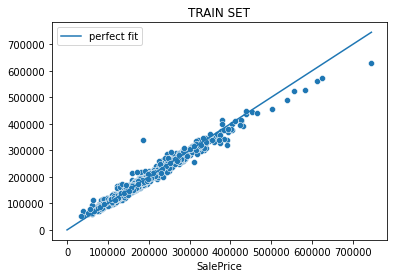

TEST SET
MAE:  20861.84019190758
R2:  0.8708297877891031


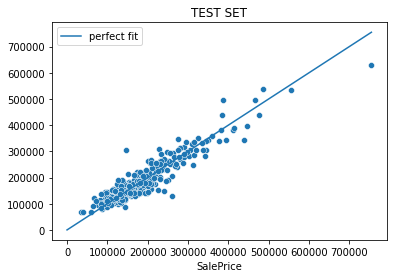

In [ ]:
### EVALUATION

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

### K parameter

Facciamo un ciclo cambiando il valore di K, cioè il numero di vicini da considerare

In [ ]:
train_r2_list = list()
test_r2_list = list()

k_list = range(1, 20)

for k in k_list:
    
    print('\nK:',k)
    
    model = KNeighborsRegressor(n_neighbors = k)
    model = model.fit(X_train, y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]
        


K: 1
TRAIN SET
MAE:  506.68036529680364
R2:  0.9975587315702826
TEST SET
MAE:  38262.098630136985
R2:  0.4842343957584131

K: 2
TRAIN SET
MAE:  19061.250228310502
R2:  0.8465182499600759
TEST SET
MAE:  34052.68630136986
R2:  0.6191873930800547

K: 3
TRAIN SET
MAE:  22180.849923896498
R2:  0.8103041906953443
TEST SET
MAE:  31751.20639269406
R2:  0.671179129203024

K: 4
TRAIN SET
MAE:  24231.688584474887
R2:  0.7710010420981998
TEST SET
MAE:  31408.267808219178
R2:  0.6818124109857351

K: 5
TRAIN SET
MAE:  25529.214977168947
R2:  0.7423970343125464
TEST SET
MAE:  30272.47835616438
R2:  0.7003914359322968

K: 6
TRAIN SET
MAE:  26579.28310502283
R2:  0.720090615029914
TEST SET
MAE:  30184.363926940638
R2:  0.7104060239193244

K: 7
TRAIN SET
MAE:  26918.622048271365
R2:  0.7141300087490084
TEST SET
MAE:  30203.67671232877
R2:  0.6965336655472593

K: 8
TRAIN SET
MAE:  27113.825799086757
R2:  0.7151887200219603
TEST SET
MAE:  30303.369863013697
R2:  0.6915401858904412

K: 9
TRAIN SET
MAE:  2

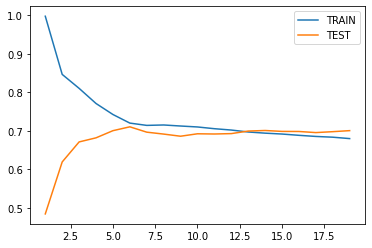

In [ ]:
plt.plot(k_list, train_r2_list, label='TRAIN')
plt.plot(k_list, test_r2_list, label='TEST')
plt.legend()
plt.show()

Si vede bene per k<5 c'è un forte overfitting, in quanto il modello performa benissimo sul train set e male sul test set. Da 5 in poi l'overfitting scompare, a discapito però della performance assoluta, che decresce lentamente

### Features scaling

Un aspetto che può influenzare fortemente la bontà delle previsioni del k-NN sono le diverse scale a cui si presentano le varie features. Per esempio è evidente che la superficie di un piano non è paragonabile con il numero di macchine del garage.

In [ ]:
sns.displot(X_train)
plt.show()

Per questo motivo si usa normalizzare i dati

#### MinMaxScaler()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
sns.displot(X_train_scaled)
plt.show()

Si sono persi i nomi delle feature perchè lo scaler dà in output un numpy.array multidimensionale. Per recuperarle basta ritrasformarlo in un DataFrame:

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
sns.displot(X_train_scaled)
plt.show()

Come si vede il MinMaxScaler, basandosi sul massimo e sul minimo di ongi feature, ha il vantaggio di rendere ben paragonabili le scale delle features tra di loro. Potrebbe essere una buona scelta in questo caso, ma non è detto però che sia la scelta migliore in ogni caso. Queste features sono tutte positive, cioè non sono mai minori di zero. Ci sono spesso innvece contesti in cui alcune feature hanno anche valori minori di zero, e potrebbe essere una buona scelta quella di avere tutte le feature centrate sullo zero. A questo scopo per esempio si può usare lo StandardScaler.

#### StandardScaler()

Lo standard scaler si basa sulle deviazioni standard di ogni feature, e come si vede facilmente, le centra tutte attorno allo zero.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
sns.displot(X_train_scaled)
plt.show()

In [ ]:
### FITTING
from sklearn.neighbors import KNeighborsRegressor
 
model = KNeighborsRegressor()
model = model.fit(X_train_scaled, y_train)

In [ ]:
### EVALUATION

train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)

train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

# DECISION TREE

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.tree import DecisionTreeRegressor

TRAIN SET
MAE:  491.6500761035007
R2:  0.9986098393167883


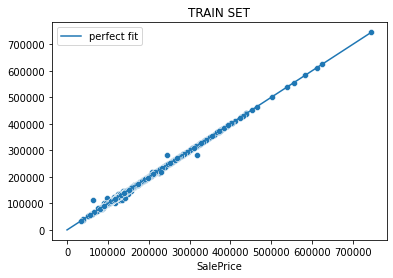

TEST SET
MAE:  28524.37123287671
R2:  0.7760723696532257


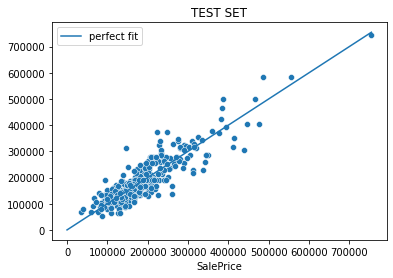

In [ ]:
### FITTING

model = DecisionTreeRegressor()
model = model.fit(X=X_train, y=y_train)

### EVALUATION

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# usiamo la funzione che abbiamo definito prima
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

E' evidente che c'è dell'overfitting, perchè sul training set ho delle previsioni praticamente perfette, mentre sul test set va molto peggio.

Posso plottare le scelte dell'albero decisionale (conviene settare max_depth basso)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,9))
_ = plot_tree(model, max_depth=2, filled=True, feature_names=list(X_train.columns), fontsize=14)

Posso anche ricavare l'importanza relativa delle feature. Gli alberi decisionali si usano in effetti anche in fase di Exploratory Data Analysis, quando si vuole capire quali sono le feature più importanti (fino ad ora avevamo usato solo le correlazioni)

### Features importance

In [ ]:
pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

OverallQual     0.596124
GrLivArea       0.188160
TotalBsmtSF     0.133866
TotRmsAbvGrd    0.049061
GarageCars      0.028241
FullBath        0.004549
dtype: float64

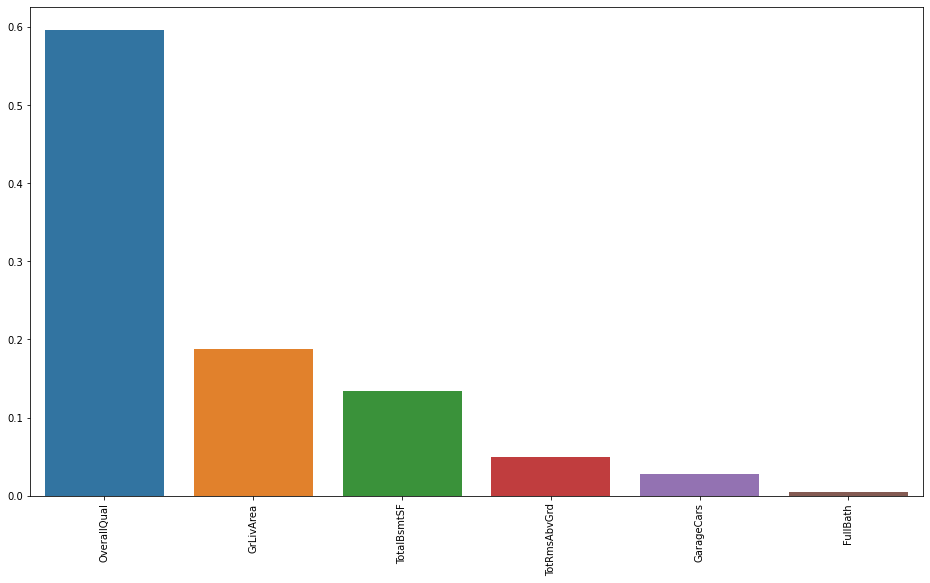

In [ ]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(16,9))
sns.barplot(x=importances.index, y=importances)
plt.xticks(rotation=90)
plt.show()

Proviamo a evitare l'overfitting limitando la max_depth dell'albero decisionale. Facciamo un ciclo su più valori. 
NB ci sarebbero tanti altri parametri su cui andare a lavorare ma noi ci limiteremo solo a max_depth

### max_depth parameter

In [ ]:
depth_list = range(3,15,1)

train_r2_list = list()
test_r2_list = list()

for n in depth_list:
    
    print('\nMax_depth:',n)
    
    model = DecisionTreeRegressor(max_depth=n)
    model = model.fit(X=X_train, y=y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # usiamo la funzione che abbiamo definito prima
    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]


Max_depth: 3
TRAIN SET
MAE:  29270.21975592393
R2:  0.730334595971369
TEST SET
MAE:  30764.064659985288
R2:  0.7312838665785322

Max_depth: 4
TRAIN SET
MAE:  24378.56382544377
R2:  0.8192438074712409
TEST SET
MAE:  26660.63613719023
R2:  0.7981006708981189

Max_depth: 5
TRAIN SET
MAE:  21231.664855187322
R2:  0.8655144100379026
TEST SET
MAE:  23172.325620994605
R2:  0.855396454900917

Max_depth: 6
TRAIN SET
MAE:  18310.10230337116
R2:  0.8986616095038582
TEST SET
MAE:  23300.691076982162
R2:  0.8451989292505822

Max_depth: 7
TRAIN SET
MAE:  16142.613663086846
R2:  0.9210458884729397
TEST SET
MAE:  22815.81561590421
R2:  0.8465344265979811

Max_depth: 8
TRAIN SET
MAE:  13217.368592253477
R2:  0.9402291991165947
TEST SET
MAE:  24290.48593621411
R2:  0.8183606550787874

Max_depth: 9
TRAIN SET
MAE:  11204.878075864055
R2:  0.95415500731588
TEST SET
MAE:  25068.738412165872
R2:  0.808095376783969

Max_depth: 10
TRAIN SET
MAE:  8496.90391342029
R2:  0.9699074046201834
TEST SET
MAE:  26396.7

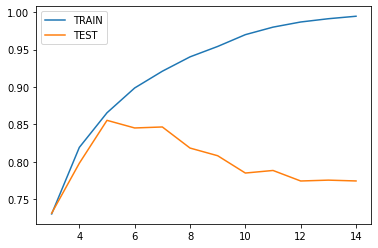

In [ ]:
plt.plot(depth_list, train_r2_list, label='TRAIN')
plt.plot(depth_list, test_r2_list, label='TEST')
plt.legend()
plt.show()

E' evidente come all'aumentare di max_depth (e quindi della complessità del modello) aumenti anche l'overfitting, cioè la distanza tra le performance di training e di test. Potremmo usare mex_depth=5, dove c'è il massimo sul test set.
Il problema dell'overfitting si può in parte risolvere usando un ensable di alberi decisionali: le Random Forest

# RANDOM FOREST

TRAIN SET
MAE:  8531.54808747554
R2:  0.9696499077067317


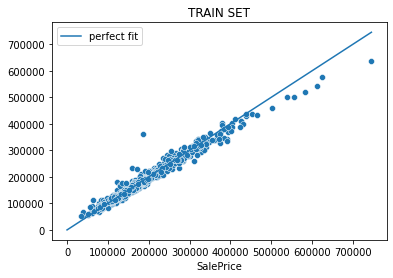

TEST SET
MAE:  20945.57425624452
R2:  0.874009298923244


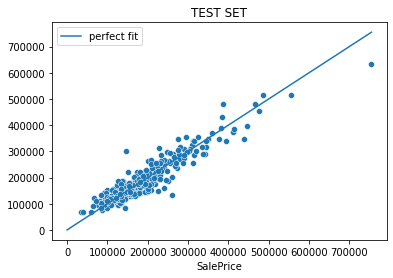

In [ ]:
from sklearn.ensemble import RandomForestRegressor

### FITTING
model = RandomForestRegressor()
model = model.fit(X=X_train, y=y_train)

### EVALUATION
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# usiamo la funzione che abbiamo definito prima
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

Senza settare alcun parametro già l'overiftting, seppure ancora presente, è molto meno pronunciato rispetto all'albero decisinoale.

Anche qui posso ricavare l'importanza relativa delle feature

### Features importance

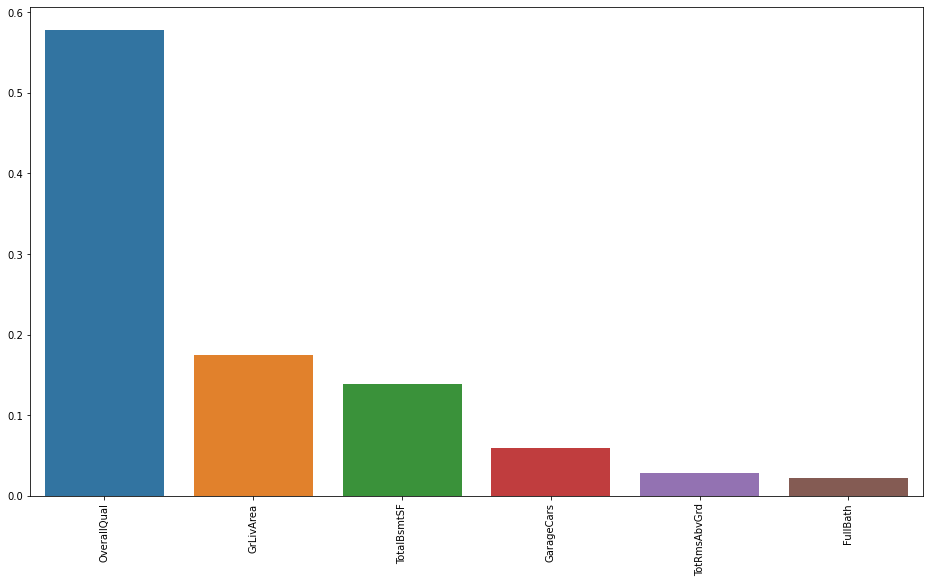

In [ ]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(16,9))
sns.barplot(x=importances.index, y=importances)
plt.xticks(rotation=90)
plt.show()

### max_depth parameter

Facendo lo stesso lavoro di prima possiamo fare un primo tuning del parametro max_depth

In [ ]:
depth_list = range(3,15,1)

train_r2_list = list()
test_r2_list = list()

for n in depth_list:
    print('\nMax_depth:',n)
    model = RandomForestRegressor(max_depth=n)
    model = model.fit(X=X_train, y=y_train)
    
    ### EVALUATION
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # usiamo la funzione che abbiamo definito prima
    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]


Max_depth: 3
TRAIN SET
MAE:  24275.76271204852
R2:  0.7972796302576268
TEST SET
MAE:  24380.24160051998
R2:  0.8115214199281773

Max_depth: 4
TRAIN SET
MAE:  21195.925005340985
R2:  0.8496397865508043
TEST SET
MAE:  21666.492682262586
R2:  0.8495226256348904

Max_depth: 5
TRAIN SET
MAE:  19050.028369884065
R2:  0.8825317635541536
TEST SET
MAE:  20450.243049278615
R2:  0.8705302028390085

Max_depth: 6
TRAIN SET
MAE:  17228.07718274407
R2:  0.9051331391615842
TEST SET
MAE:  19799.45277217669
R2:  0.8793673485679374

Max_depth: 7
TRAIN SET
MAE:  15575.311095215638
R2:  0.924059685842458
TEST SET
MAE:  20155.49154099121
R2:  0.877930881473581

Max_depth: 8
TRAIN SET
MAE:  14054.939484878507
R2:  0.9379955454554774
TEST SET
MAE:  20191.351205227973
R2:  0.880648047899203

Max_depth: 9
TRAIN SET
MAE:  12579.882988557165
R2:  0.9478103387187048
TEST SET
MAE:  20583.036561715395
R2:  0.8773343508507283

Max_depth: 10
TRAIN SET
MAE:  11409.371771505921
R2:  0.9578919226026815
TEST SET
MAE:  20

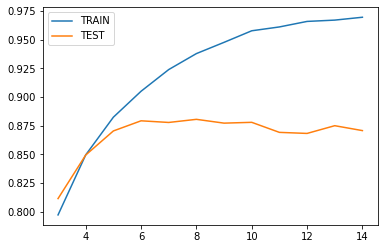

In [ ]:
plt.plot(depth_list, train_r2_list, label='TRAIN')
plt.plot(depth_list, test_r2_list, label='TEST')
plt.legend()
plt.show()

Possiamo scegliere di usare max_depth = 7, dove c'è il picco di performance sul test set